![](https://hsto.org/getpro/habr/post_images/68f/fc1/d69/68ffc1d69c10d1ede103288c779c8f4e.jpg) 

# Наша первая нейросеть в Keras 

Изначально Keras создавалася как удобная надстройка над Theano. Отсюда появилось такое греческой название пакета (переводится как "рог"), ставшее отсылкой к Одиссее Гомера. Сегодня Keras поддерживает второй знаменитый фрэймворк Tensorflow, созданный Google и использует кго в качестве базового. 

## 1. О задаче, которую мы будем решать

Для своего первого знакомства с нейросетками, мы будем использовать встроенный датасет под названием `boston_housing`. Как это не удивительно, речь пойдёт о недвижимости и ценах на неё. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [4]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [5]:
X_train.shape

(404, 13)

In [6]:
X_test.shape

(102, 13)

Проскалируем переменные.

In [7]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

## 2. Регрессия - моя профессия 

Оцените уже давно и до боли нам знакомую линейную регрессию. Посмотрите на качество модели. Прикрутите к ней $l_2$-регуляризатор, подберите оптимальное значение для гиерпараметра с помощью `greadsearch`. Посмотрите на качество модели. В качестве метрики используйте $MSE$. 

### Оценка линейной регрессии без регуляризации

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание модели линейной регрессии
lr_model = LinearRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели с использованием метрики MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) без регуляризации: {mse:.4f}")

Mean Squared Error (MSE) без регуляризации: 23.1956


### Линейная регрессия с $l_2$-регуляризацией

In [13]:
from sklearn.linear_model import Ridge

# Создание модели линейной регрессии с l_2 регуляризацией (Ridge)
ridge_model = Ridge()

# Обучение модели на тренировочных данных
ridge_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_ridge = ridge_model.predict(X_test)

# Оценка качества модели с использованием MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (MSE) с l_2 регуляризацией: {mse_ridge:.4f}")

Mean Squared Error (MSE) с l_2 регуляризацией: 23.1055


### Подбор оптимального гиперпараметра с помощью greadsearch

In [14]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Создание модели Ridge
ridge_model = Ridge()

# Определение поиска по сетке параметров
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Обучение модели с подбором гиперпараметра
grid_search.fit(X_train, y_train)

# Лучший параметр alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Лучшее значение alpha для l_2 регуляризации: {best_alpha}")

# Оценка модели с лучшим alpha
y_pred_best_ridge = grid_search.predict(X_test)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
print(f"Mean Squared Error (MSE) с оптимальным alpha: {mse_best_ridge:.4f}")

Лучшее значение alpha для l_2 регуляризации: 1
Mean Squared Error (MSE) с оптимальным alpha: 23.1055


## 3. Нейросеть - регрессия

Как это не удивительно, линейная регрессия это частный, самый простой случай нейросети. Постройте в keras нейросеть из одного нейрона. Обучите её. Посмотрите на качество, сравните с обычной регрессией. 

### Построение простой нейросети с одним нейроном

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

# Построение модели нейросети с одним нейроном
model = Sequential()

# Использование слоя Input для определения входной формы
model.add(Input(shape=(X_train.shape[1],)))  # Входной слой

# Один нейрон с линейной активацией
model.add(Dense(1, activation='linear'))

# Компиляция модели
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

# Предсказание на тестовых данных
y_pred_nn = model.predict(X_test)

# Оценка качества модели с использованием MSE
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error (MSE) нейросети с одним нейроном: {mse_nn:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE) нейросети с одним нейроном: 23.9677


### Визуализация процесса обучения

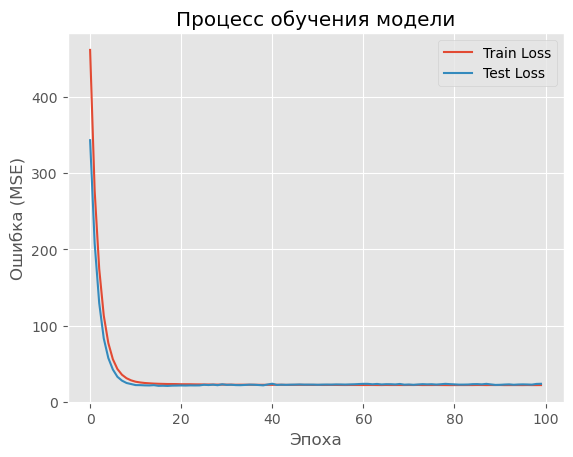

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Процесс обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.legend()
plt.show()

Прикрутите к сетке [регуляризатор.](https://keras.io/regularizers/) Посмотрите на качество модели.

### Вариант с $l_2$-регуляризацией

In [21]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

# Значение коэффициента регуляризации
l2_reg = 0.01  # Можно подобрать оптимальное значение с помощью GridSearch

# Построение модели нейросети с одним нейроном и l_2 регуляризацией
model = Sequential()

# Входной слой
model.add(Input(shape=(X_train.shape[1],)))

# Один нейрон с линейной активацией и l_2 регуляризацией
model.add(Dense(1, activation='linear', kernel_regularizer=l2(l2_reg)))

# Компиляция модели
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

# Предсказание на тестовых данных
y_pred_nn_l2 = model.predict(X_test)

# Оценка качества модели с использованием MSE
mse_nn_l2 = mean_squared_error(y_test, y_pred_nn_l2)
print(f"Mean Squared Error (MSE) нейросети с l_2 регуляризацией: {mse_nn_l2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE) нейросети с l_2 регуляризацией: 23.1516


### Визуализация процесса обучения (с $l_2$-регуляризацией)

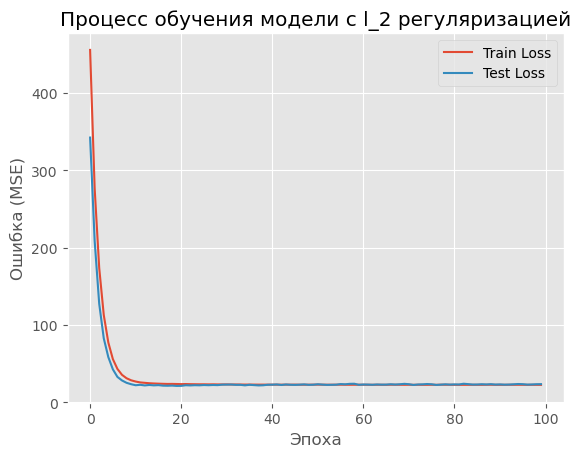

In [22]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Процесс обучения модели с l_2 регуляризацией')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.legend()
plt.show()

## 4. Один слой и оптимальное число нейронов 

**Итак, небольшое задание для самостоятельной работы.**

Постройте нейронную сеть с одним скрытым слоем. Постройте для неё картинку с зависимостью качества модели от числа используемых в сети нейронов на обучении и тесте. По оси $x$ отложите число нейронов, используемое в слое. По оси $y$ качество модели. Для борьбы с переобучением используйте early stopping. Число нейронов перебирайте от $1$ до $20$. Запаситесь терпением и не забудьте проинтерпретировать картинки.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

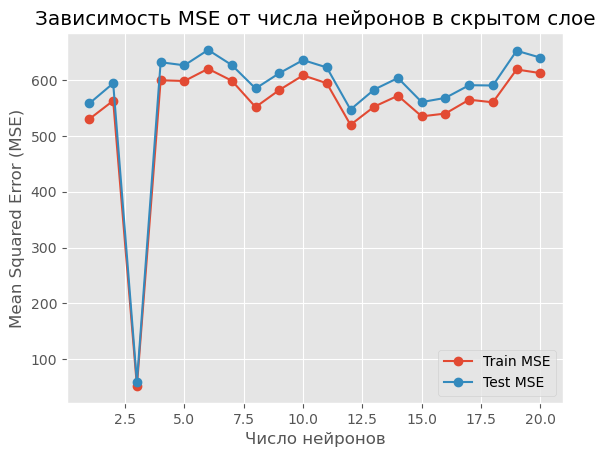

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Списки для хранения ошибок
train_mse = []
test_mse = []

# Настройка ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Перебор количества нейронов от 1 до 20
for neurons in range(1, 21):
    # Построение модели
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Входной слой
    model.add(Dense(neurons, activation='relu'))  # Скрытый слой с переменным количеством нейронов
    model.add(Dense(1, activation='linear'))  # Выходной слой
    
    # Компиляция модели
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Обучение модели с ранней остановкой
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                        callbacks=[early_stopping], verbose=0)
    
    # Предсказания на обучающих и тестовых данных
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Оценка ошибки на обучающих и тестовых данных
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Построение графика
plt.plot(range(1, 21), train_mse, label='Train MSE', marker='o')
plt.plot(range(1, 21), test_mse, label='Test MSE', marker='o')
plt.title('Зависимость MSE от числа нейронов в скрытом слое')
plt.xlabel('Число нейронов')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


### Интерпретация графика:
1. Если тестовая ошибка сначала уменьшается, а затем снова начинает увеличиваться, это указывает на переобучение модели при большом количестве нейронов.
2. Если ошибка стабильно уменьшается с увеличением количества нейронов, это может означать, что модель ещё не переобучилась.
3. График должен показать, какое количество нейронов оптимально для минимальной ошибки на тестовых данных.

## 5. Больше слоёв

Попробуйте построит двух и трёх-слойные сетки с разным числом нейронов. Попробуйте добиться максимально возможного качества. Обратите внимание, что данных у нас очень мало, нейронка будем маленькой и быстро оцениваимой. Это позволяет делать перебор гиперпараметров. Когда данных очень много, перебор - довольно сложная штука. 

### Двухслойная НС

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Списки для хранения ошибок
train_mse_2layers = []
test_mse_2layers = []

# Настройка ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Количество нейронов до 1-10 для двухслойной модели
for neurons_layer1 in range(1, 11):
    for neurons_layer2 in range(1, 11):
        print(f"Обучение модели с {neurons_layer1} нейронами в первом слое и {neurons_layer2} во втором слое")
        
        # Построение модели с двумя скрытыми слоями
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))  # Входной слой
        model.add(Dense(neurons_layer1, activation='relu', kernel_regularizer='l2'))  # Первый скрытый слой
        model.add(Dense(neurons_layer2, activation='relu', kernel_regularizer='l2'))  # Второй скрытый слой
        model.add(Dense(1, activation='linear'))  # Выходной слой
        
        # Компиляция модели
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # Обучение модели с ранней остановкой
        history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                            callbacks=[early_stopping], verbose=1)
        
        # Предсказания на обучающих и тестовых данных
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Оценка ошибки на обучающих и тестовых данных
        train_mse_2layers.append((neurons_layer1, neurons_layer2, mean_squared_error(y_train, y_train_pred)))
        test_mse_2layers.append((neurons_layer1, neurons_layer2, mean_squared_error(y_test, y_test_pred)))

# Нахождение модели с минимальной ошибкой на тестовой выборке
best_config_2layers = min(test_mse_2layers, key=lambda x: x[2])
print(f"Лучшая конфигурация двухслойной сети: {best_config_2layers[0]} нейронов в первом слое, "
      f"{best_config_2layers[1]} нейронов во втором слое с MSE = {best_config_2layers[2]:.4f}")


Обучение модели с 1 нейронами в первом слое и 1 во втором слое
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 594.8284 - val_loss: 615.2888
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 604.2688 - val_loss: 614.6894
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 577.7208 - val_loss: 614.0943
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 636.7625 - val_loss: 613.4912
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 612.4836 - val_loss: 612.8925
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 591.4733 - val_loss: 612.2979
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 578.9967 - val_loss: 611.7020
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 605.4388 - val_loss: 611.1028
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 624.8367 - val_loss: 610.5071
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 575.3578 - val_loss: 609.9136
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - l

### Трехслойная НС

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Списки для хранения ошибок
train_mse_3layers = []
test_mse_3layers = []

# Настройка ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Количество нейронов до 1-10 для трехслойной модели
for neurons_layer1 in range(1, 11):
    for neurons_layer2 in range(1, 11):
        for neurons_layer3 in range(1, 11):
            print(f"Обучение модели с {neurons_layer1} нейронами в первом слое, {neurons_layer2} во втором, и {neurons_layer3} в третьем слое")
            
            # Построение модели с тремя скрытыми слоями
            model = Sequential()
            model.add(Input(shape=(X_train.shape[1],)))  # Входной слой
            model.add(Dense(neurons_layer1, activation='relu', kernel_regularizer='l2'))  # Первый скрытый слой
            model.add(Dense(neurons_layer2, activation='relu', kernel_regularizer='l2'))  # Второй скрытый слой
            model.add(Dense(neurons_layer3, activation='relu', kernel_regularizer='l2'))  # Третий скрытый слой
            model.add(Dense(1, activation='linear'))  # Выходной слой
            
            # Компиляция модели
            model.compile(optimizer='adam', loss='mean_squared_error')
            
            # Обучение модели с ранней остановкой
            history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                                callbacks=[early_stopping], verbose=1)
            
            # Предсказания на обучающих и тестовых данных
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Оценка ошибки на обучающих и тестовых данных
            train_mse_3layers.append((neurons_layer1, neurons_layer2, neurons_layer3, mean_squared_error(y_train, y_train_pred)))
            test_mse_3layers.append((neurons_layer1, neurons_layer2, neurons_layer3, mean_squared_error(y_test, y_test_pred)))

# Нахождение модели с минимальной ошибкой на тестовой выборке
best_config_3layers = min(test_mse_3layers, key=lambda x: x[3])
print(f"Лучшая конфигурация трехслойной сети: {best_config_3layers[0]} нейронов в первом слое, "
      f"{best_config_3layers[1]} нейронов во втором слое, {best_config_3layers[2]} нейронов в третьем слое с MSE = {best_config_3layers[3]:.4f}")


Обучение модели с 1 нейронами в первом слое, 1 во втором, и 1 в третьем слое
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 599.4312 - val_loss: 615.2802
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 548.2065 - val_loss: 614.6820
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 585.0402 - val_loss: 614.0811
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 585.7325 - val_loss: 613.4836
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 584.0207 - val_loss: 612.8834
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 575.1229 - val_loss: 612.2878
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 553.6812 - val_loss: 611.6909
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 586.2609 - val_loss: 611.0930
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 609.0889 - val_loss: 610.4947
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 588.1570 - val_loss: 609.9022
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

### Объяснение:
1. Модель с двумя скрытыми слоями: Мы перебираем количество нейронов в первом и втором слое в диапазоне от 1 до 10, обучаем модели с ранней остановкой и сохраняем MSE для каждой конфигурации.
2. Модель с тремя скрытыми слоями: Аналогично, но с дополнительным третьим слоем. Мы варьируем количество нейронов во всех трёх слоях и оцениваем качество модели.
3. Ранняя остановка: EarlyStopping прекратит обучение, если в течение 10 эпох качество на валидационных данных не будет улучшаться.
4. Поиск лучшей модели: После завершения перебора мы находим конфигурацию с минимальной ошибкой на тестовой выборке.